In [ ]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import plotly.express as px
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
Using TensorFlow backend.


In [ ]:
symptoms={'symptom':['Fever',
        'Dry cough',
        'Fatigue',
        'Sputum production',
        'Shortness of breath',
        'Muscle pain',
        'Sore throat',
        'Headache',
        'Chills',
        'Nausea or vomiting',
        'Nasal congestion',
        'Diarrhoea',
        'Haemoptysis',
        'Conjunctival congestion'],'percentage':[87.9,67.7,38.1,33.4,18.6,14.8,13.9,13.6,11.4,5.0,4.8,3.7,0.9,0.8]}

symptoms=pd.DataFrame(data=symptoms,index=range(14))
symptoms

,symptom,percentage
0,Fever,87.9
1,Dry cough,67.7
2,Fatigue,38.1
3,Sputum production,33.4
4,Shortness of breath,18.6
5,Muscle pain,14.8
6,Sore throat,13.9
7,Headache,13.6
8,Chills,11.4
9,Nausea or vomiting,5.0


In [ ]:
fig = px.bar(symptoms[['symptom', 'percentage']].sort_values('percentage', ascending=False), 
             y="percentage", x="symptom", color='symptom', 
             log_y=True, template='ggplot2', title='Symptom of Coronavirus')
fig.show()

In [ ]:
fig = px.pie(symptoms,
             values="percentage",
             names="symptom",
             template="seaborn")
fig.update_traces(rotation=90, pull=0.05, textinfo="percent+label", title="symptoms" )
fig.show()

<Figure size 720x432 with 0 Axes>

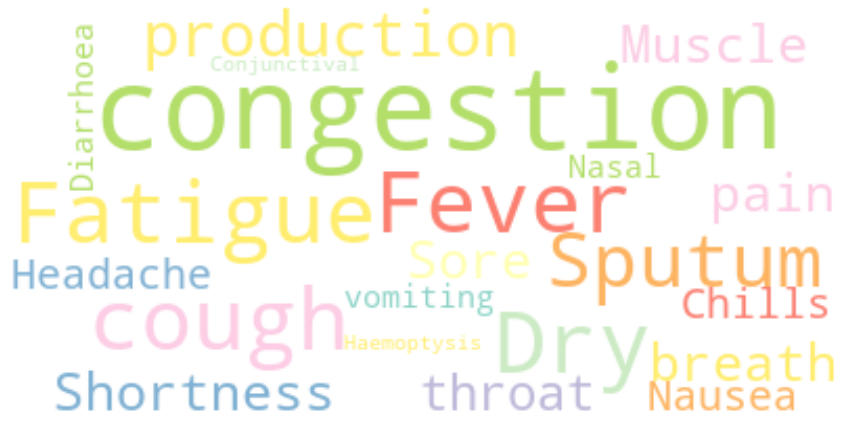

In [ ]:
from wordcloud import WordCloud, ImageColorGenerator
text = " ".join(str(each) for each in symptoms.symptom)
wordcloud = WordCloud(max_words=200,colormap='Set3', background_color="white").generate(text)
plt.figure(figsize=(10,6))
plt.figure(figsize=(15,10))
plt.imshow(wordcloud, interpolation='Bilinear')
plt.axis("off")
plt.figure(1,figsize=(12, 12))
plt.show()

In [ ]:
import pandas as pd
data=pd.read_csv('covid19_italy_region.csv',index_col='Date',parse_dates=True)
province=pd.read_csv('covid19-ita-province.csv',index_col='date',parse_dates=True)
data_with_age=pd.read_csv('covid-age.csv')
data_with_nationality=pd.read_csv('covid-nationality.csv',index_col='date',parse_dates=True)

In [ ]:
##Looking into data
data.head()

,SNo,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
Date,,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,1,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,2,ITA,21,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,3,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,NaN
2020-02-24 18:00:00,4,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,NaN


In [ ]:
##Shape of data
data.shape


(1911, 16)

In [ ]:
data.dropna(how = 'all',inplace = True)

In [ ]:
##Checking Na values
data.isna().sum()

SNo                             0
Country                         0
RegionCode                      0
RegionName                      0
Latitude                        0
Longitude                       0
HospitalizedPatients            0
IntensiveCarePatients           0
TotalHospitalizedPatients       0
HomeConfinement                 0
CurrentPositiveCases            0
NewPositiveCases                0
Recovered                       0
Deaths                          0
TotalPositiveCases              0
TestsPerformed               1155
dtype: int64

In [ ]:
##Data description
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,1911.0,955.000000,551.802501,0.000000,477.500000,955.000000,1432.500000,1910.000000
RegionCode,1911.0,11.857143,6.275440,1.000000,7.000000,12.000000,17.000000,22.000000
Latitude,1911.0,43.046293,2.489432,38.115697,41.125596,43.616760,45.434905,46.499335
Longitude,1911.0,12.225955,2.659644,7.320149,11.121231,12.388247,13.768136,16.867367
HospitalizedPatients,1911.0,768.776557,1758.748117,0.000000,44.500000,167.000000,618.000000,12077.000000
IntensiveCarePatients,1911.0,91.618524,186.365498,0.000000,5.000000,24.000000,92.000000,1381.000000
TotalHospitalizedPatients,1911.0,860.395081,1938.979003,0.000000,50.000000,198.000000,714.500000,13328.000000
HomeConfinement,1911.0,2207.672946,4297.378926,0.000000,116.000000,660.000000,2224.000000,30382.000000
CurrentPositiveCases,1911.0,3068.068027,5948.711028,0.000000,189.000000,898.000000,2954.500000,37307.000000
NewPositiveCases,1911.0,120.277342,267.610666,-18.000000,5.000000,30.000000,106.000000,3251.000000


In [ ]:
data_with_nationality.head()

,Unnamed: 0,state,hospitalized_with_symptoms,intensive_care,total_hospitalized,home_quarantine,total_confirmed_cases,variation_total_confirmed,new_confirmed_cases,recovered,deaths,total_cases,swabs_made,note_it,note_en
date,,,,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,101,26,127,94,221,0,221,1,7,229,4324,NaN,NaN
2020-02-25 18:00:00,1,ITA,114,35,150,162,311,90,93,1,10,322,8623,NaN,NaN
2020-02-26 18:00:00,2,ITA,128,36,164,221,385,74,78,3,12,400,9587,NaN,NaN
2020-02-27 18:00:00,3,ITA,248,56,304,284,588,203,250,45,17,650,12014,NaN,NaN
2020-02-28 18:00:00,4,ITA,345,64,409,412,821,233,238,46,21,888,15695,NaN,NaN


In [ ]:
data_with_age.head()

,Unnamed: 0,age_classes,male_cases,male_deaths,male_deaths.1,female_deaths,total_cases,total_deaths,piemonte_cases,lombardia_cases,veneto_cases,emilia-romagna_cases,valleaosta_cases,trento_cases,friuli-veneziagiulia_cases,liguria_cases,toscana_cases,umbria_cases,marche_cases,lazio_cases,abruzzo_cases,molise_cases,campania_cases,puglia_cases,sicilia_cases,sardegna_cases
0,0,0-9,381,0,307,0,693,0,35,205,90,73,9,19,12,16,56,22,20,35,16,1,17,21,12,7
1,1,13-19,475,0,454,0,931,0,29,170,164,131,7,27,33,18,66,20,29,48,41,7,30,34,23,8
2,2,20-29,1919,4,2531,2,4530,6,311,1494,715,619,32,128,107,64,167,65,127,152,62,6,102,117,59,23
3,3,30-39,3505,22,3885,7,7466,29,479,2778,879,1075,41,202,143,137,264,96,265,283,124,12,138,195,85,70
4,4,40-49,6480,81,7130,29,13701,110,1021,5436,1460,1982,76,365,229,219,523,111,472,436,238,22,203,298,147,115


In [ ]:
province.head()

,Unnamed: 0,state,region_code,region,province_code,province,province_ISO,lat,long,total_cases,note_it,note_en
date,,,,,,,,,,,,
2020-02-24 18:00:00,0,ITA,13,Abruzzo,69,Chieti,CH,42.351032,14.167546,0,NaN,NaN
2020-02-24 18:00:00,1,ITA,13,Abruzzo,66,L'Aquila,AQ,42.351222,13.398438,0,NaN,NaN
2020-02-24 18:00:00,2,ITA,13,Abruzzo,68,Pescara,PE,42.464584,14.213648,0,NaN,NaN
2020-02-24 18:00:00,3,ITA,13,Abruzzo,67,Teramo,TE,42.658918,13.704400,0,NaN,NaN
2020-02-24 18:00:00,4,ITA,13,Abruzzo,979,In fase di definizione/aggiornamento,NaN,0.000000,0.000000,0,NaN,NaN


In [ ]:
provincegrp = province.groupby("province")[["total_cases"]].max().reset_index()
provincegrp.head()

,province,total_cases
0,Agrigento,131
1,Alessandria,2407
2,Ancona,1647
3,Aosta,958
4,Arezzo,522


In [ ]:
fig = px.bar(provincegrp[['province', 'total_cases']].sort_values('total_cases', ascending=False), 
             y="total_cases", x="province", color='province', 
             log_y=True, template='ggplot2', title='Province vs Confirmation')
fig.show()

/usr/local/lib/python3.6/dist-packages/seaborn/axisgrid.py:243: UserWarning:

The `size` parameter has been renamed to `height`; please update your code.



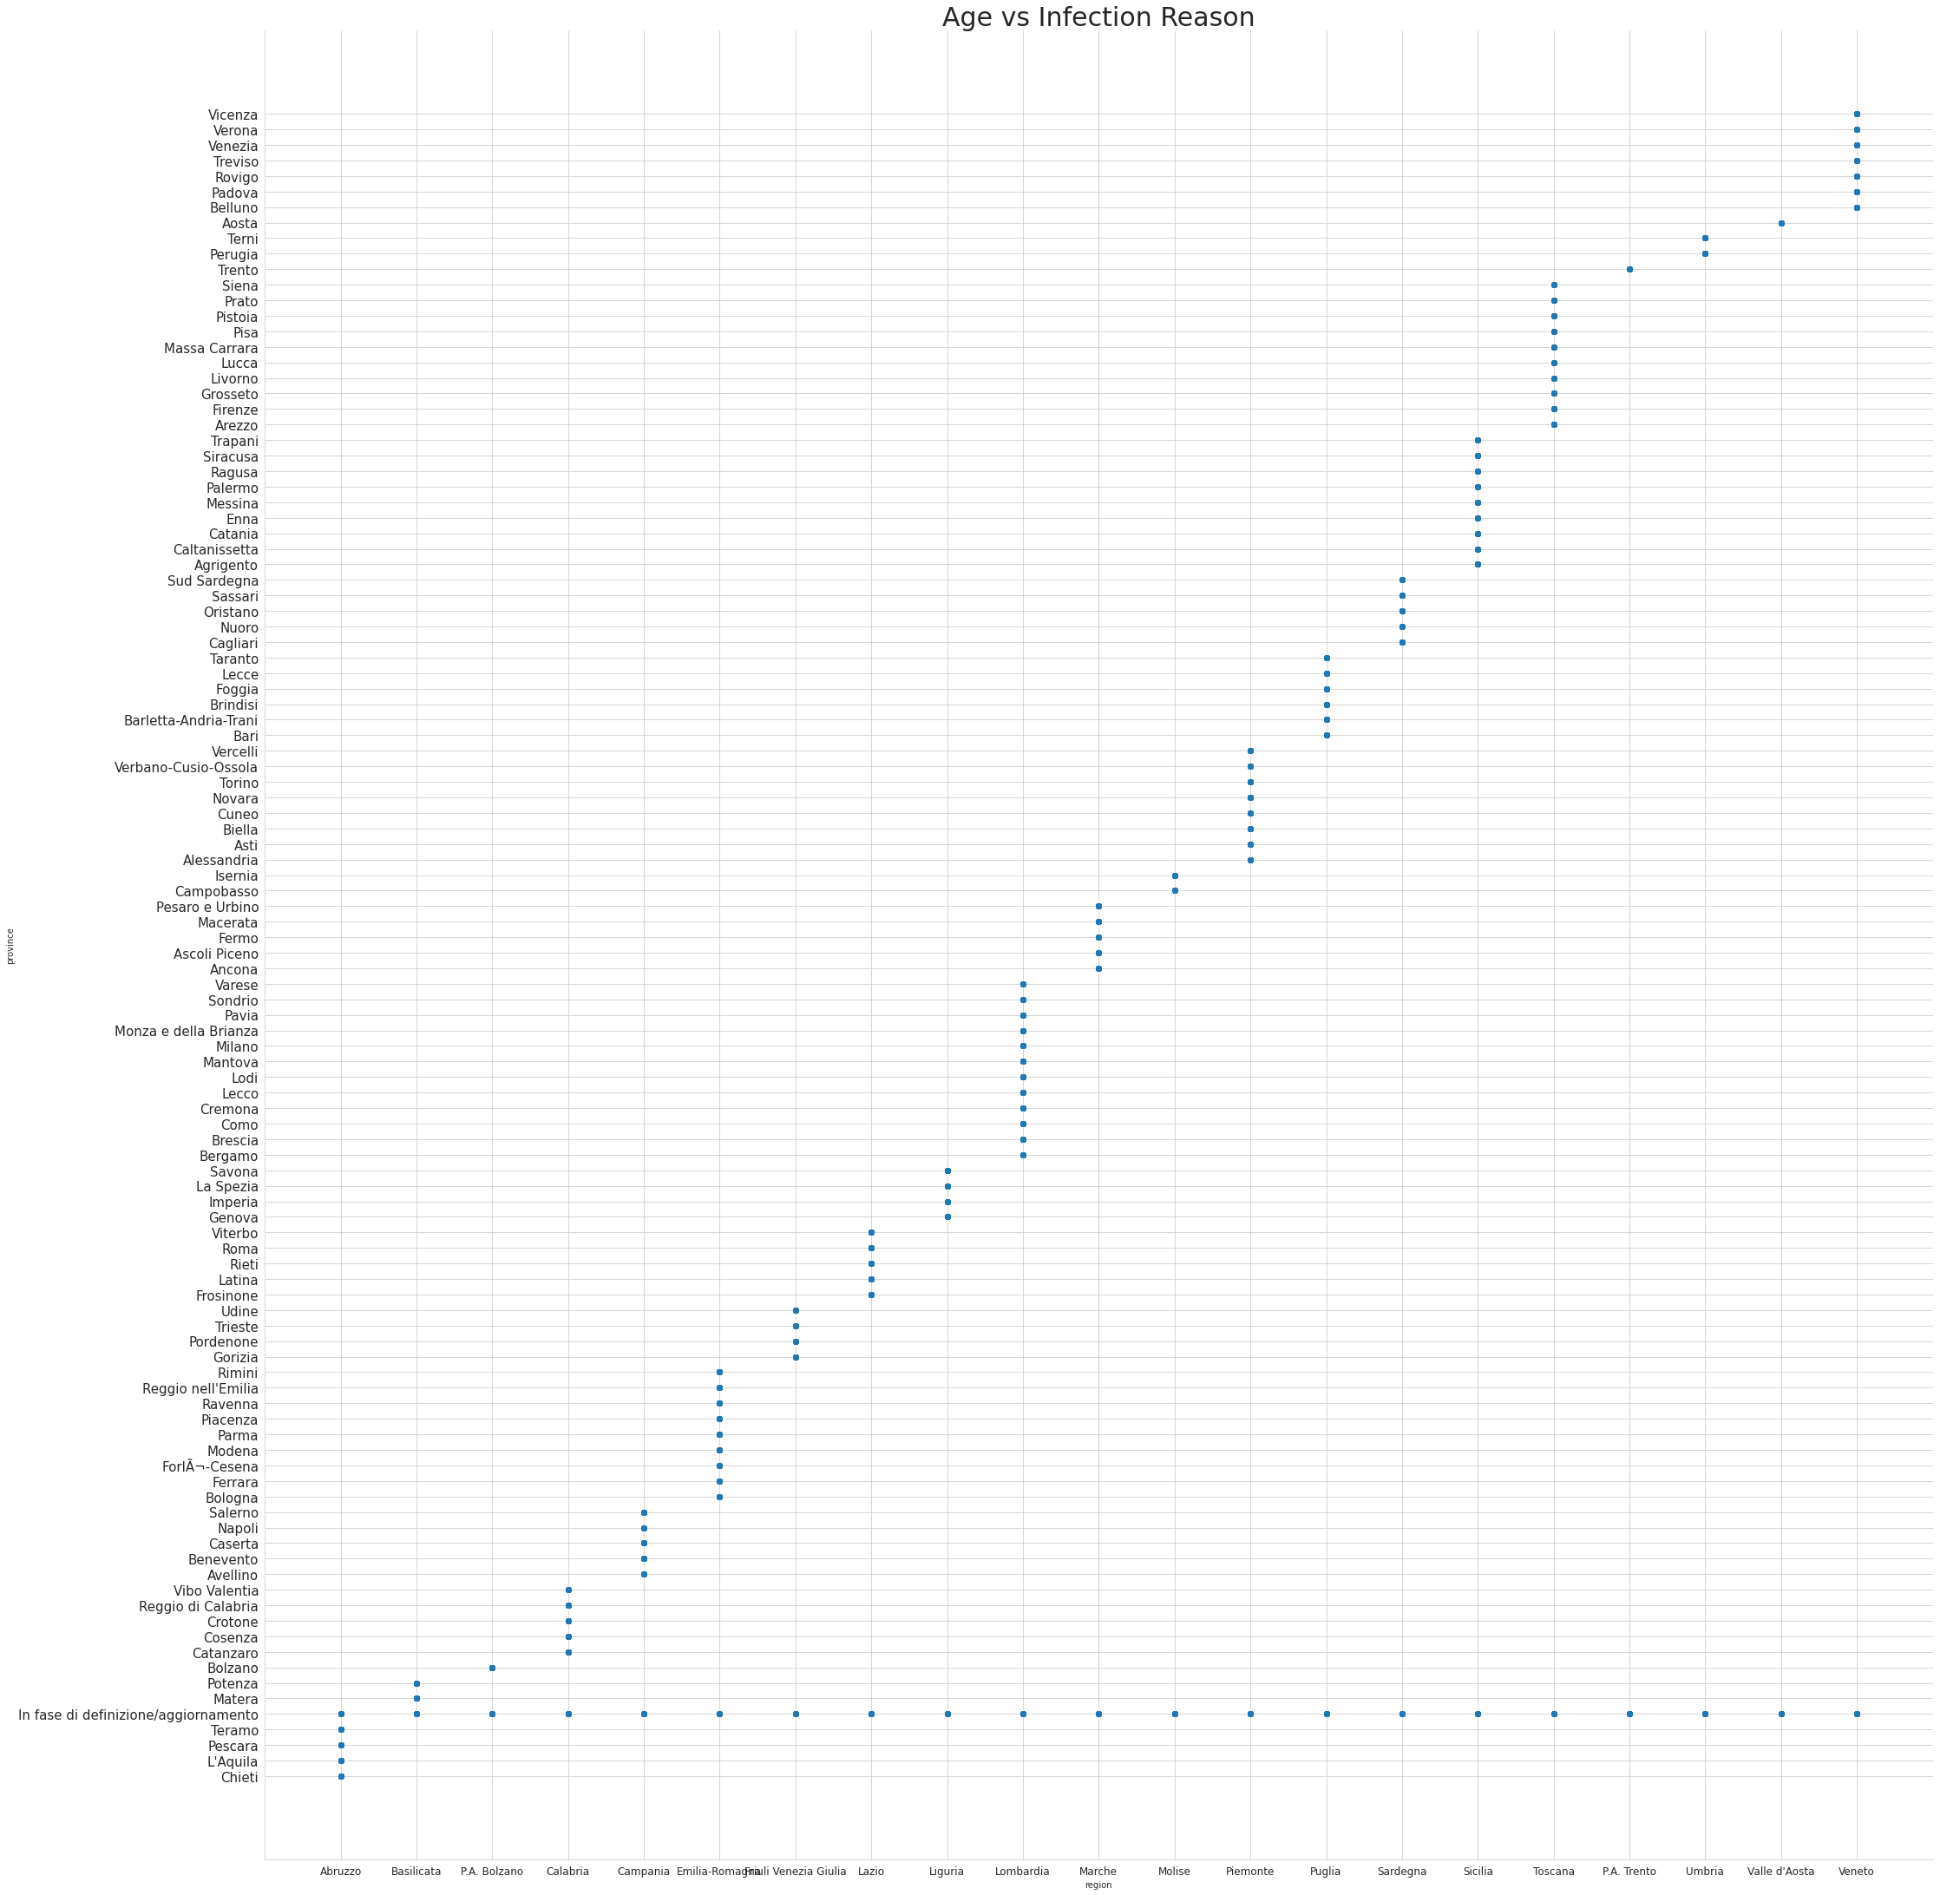

In [ ]:
sns.set_style("whitegrid")
sns.FacetGrid(province,  size = 30)\
.map(plt.scatter, 'region', 'province')\
.add_legend()
plt.title('Age vs Infection Reason',fontsize=30)
plt.xticks(fontsize=12)
plt.yticks(fontsize=15)
plt.show()

In [ ]:
data_with_nationality.describe().T

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,52.0,25.500000,15.154757,0.0,12.75,25.5,38.25,51.0
hospitalized_with_symptoms,52.0,15829.019231,11650.376253,101.0,3330.50,16864.0,28014.00,29010.0
intensive_care,52.0,2244.961538,1524.143642,26.0,629.25,2756.0,3632.25,4068.0
total_hospitalized,52.0,18074.000000,13154.863401,127.0,3959.75,19620.0,31350.25,33004.0
home_quarantine,52.0,27530.096154,26283.262118,94.0,2095.75,20650.5,50986.75,74696.0
total_confirmed_cases,52.0,45604.076923,38785.544346,221.0,6055.50,40270.5,83633.75,105418.0
variation_total_confirmed,52.0,2023.019231,1406.300410,0.0,661.25,1990.0,2945.75,4821.0
new_confirmed_cases,52.0,3175.903846,1967.991484,78.0,1179.50,3558.0,4716.00,6557.0
recovered,52.0,10674.000000,11944.454659,1.0,613.75,5600.5,18648.00,38092.0
deaths,52.0,7320.250000,7493.701135,7.0,332.75,4428.5,14106.50,21645.0


In [ ]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd3 = data_groupby_date1
dgd3.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,2020-02-24 18:00:00,229,7,1,0.0,101,127
1,2020-02-25 18:00:00,322,10,1,0.0,114,149
2,2020-02-26 18:00:00,400,12,3,0.0,128,164
3,2020-02-27 18:00:00,650,17,45,0.0,248,304
4,2020-02-28 18:00:00,888,21,46,0.0,345,409


In [ ]:
dgd2 = dgd3
dgd2['Date']

0    2020-02-24 18:00:00
1    2020-02-25 18:00:00
2    2020-02-26 18:00:00
3    2020-02-27 18:00:00
4    2020-02-28 18:00:00
             ...        
86   2020-05-20 17:00:00
87   2020-05-21 17:00:00
88   2020-05-22 17:00:00
89   2020-05-23 17:00:00
90   2020-05-24 17:00:00
Name: Date, Length: 91, dtype: datetime64[ns]

In [ ]:
dgd2 = dgd2.tail(14)

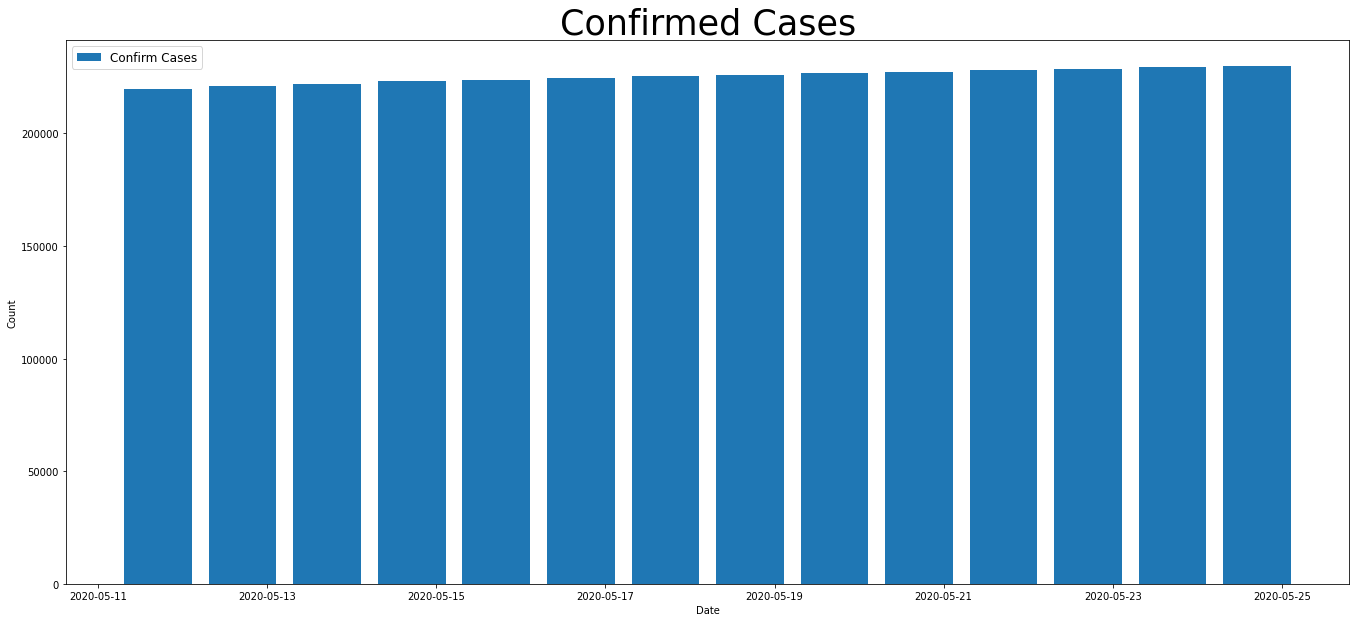

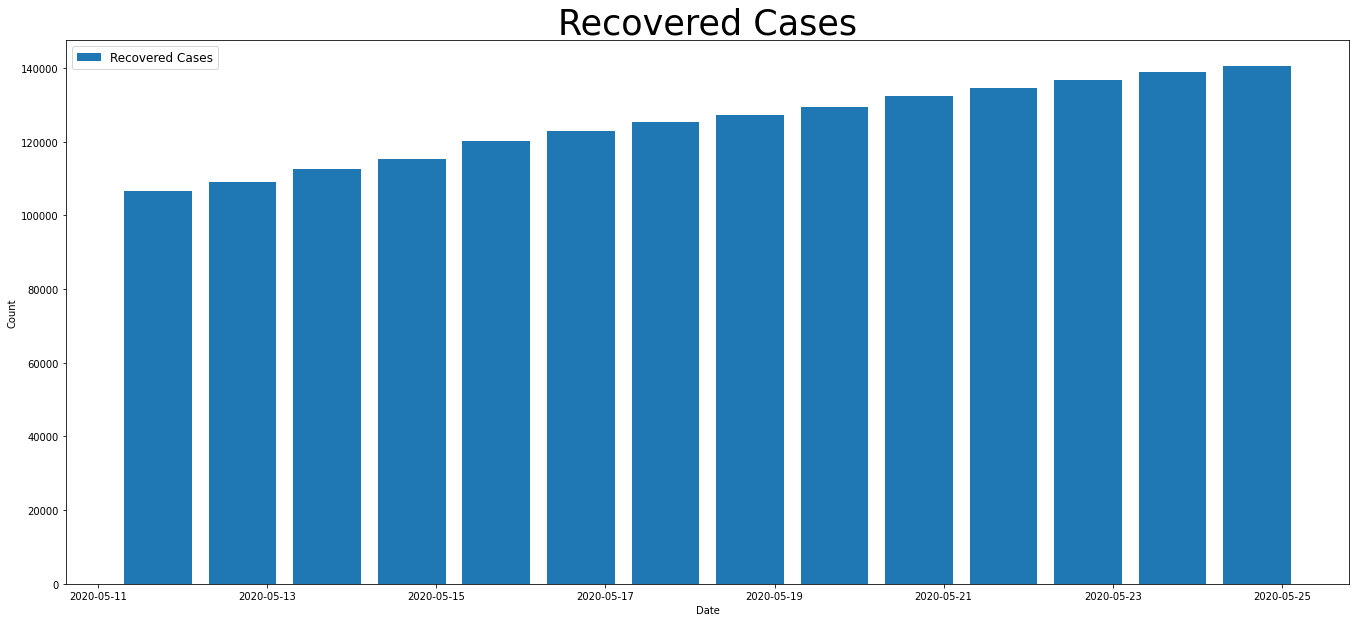

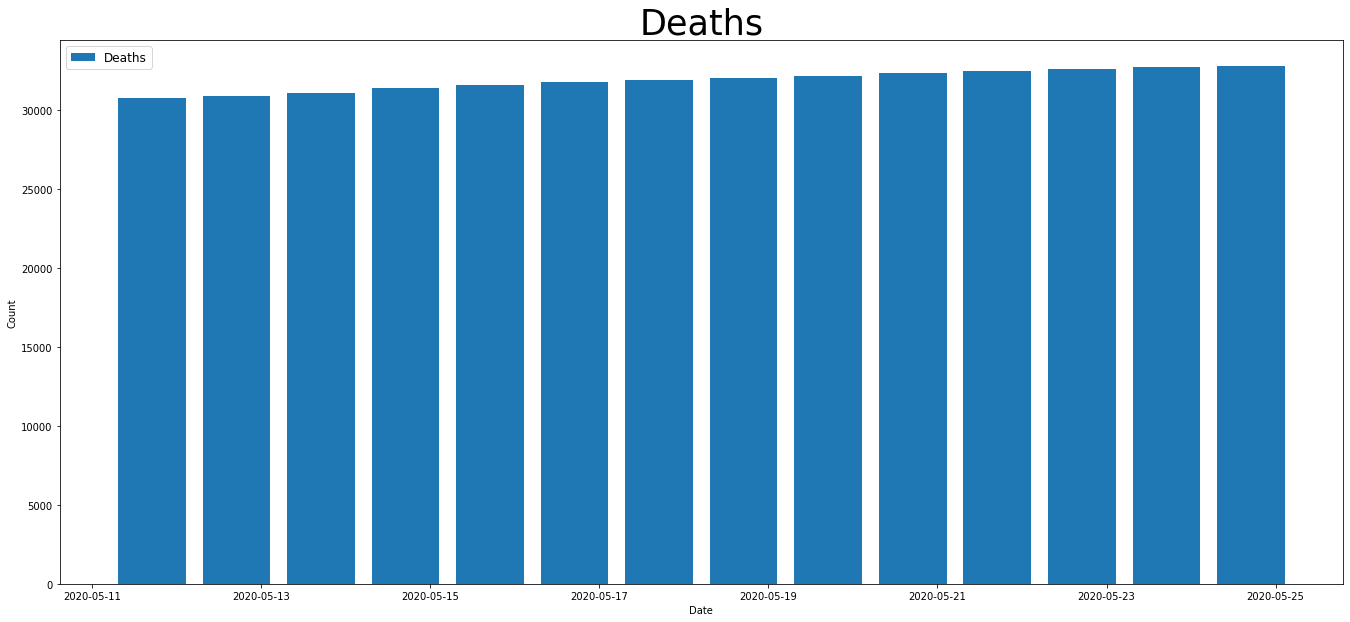

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovered Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Recovered Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.Deaths,label="Deaths")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Deaths',fontsize = 35)
plt.show()

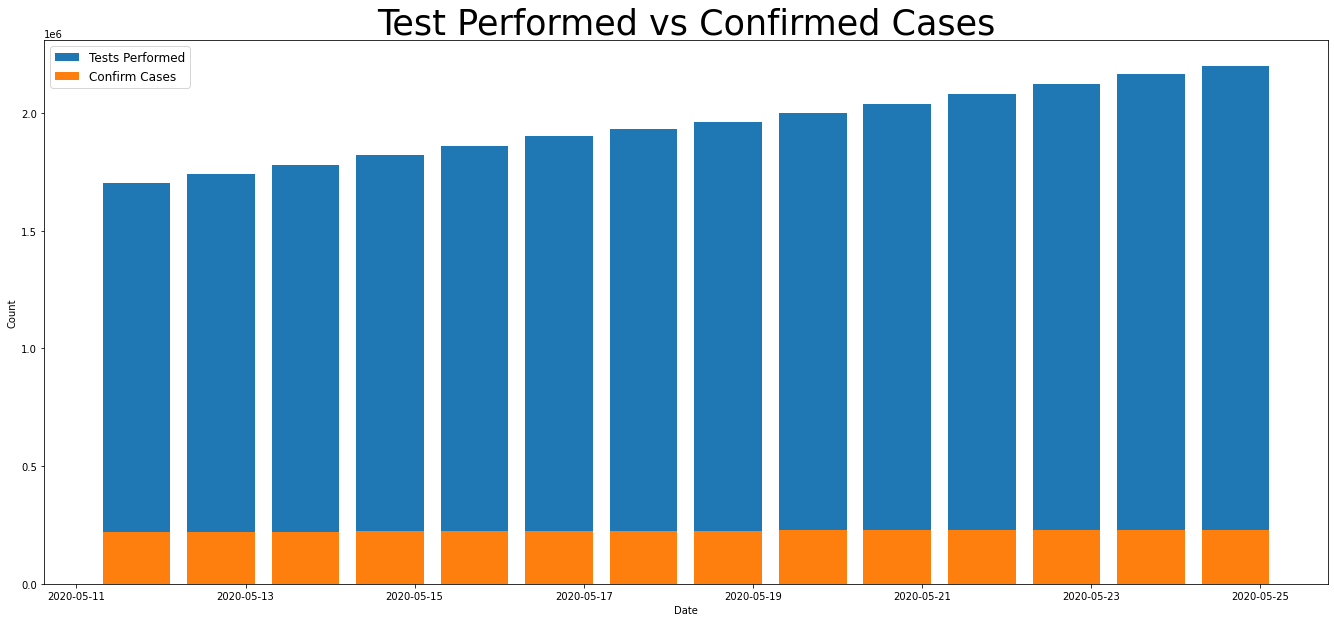

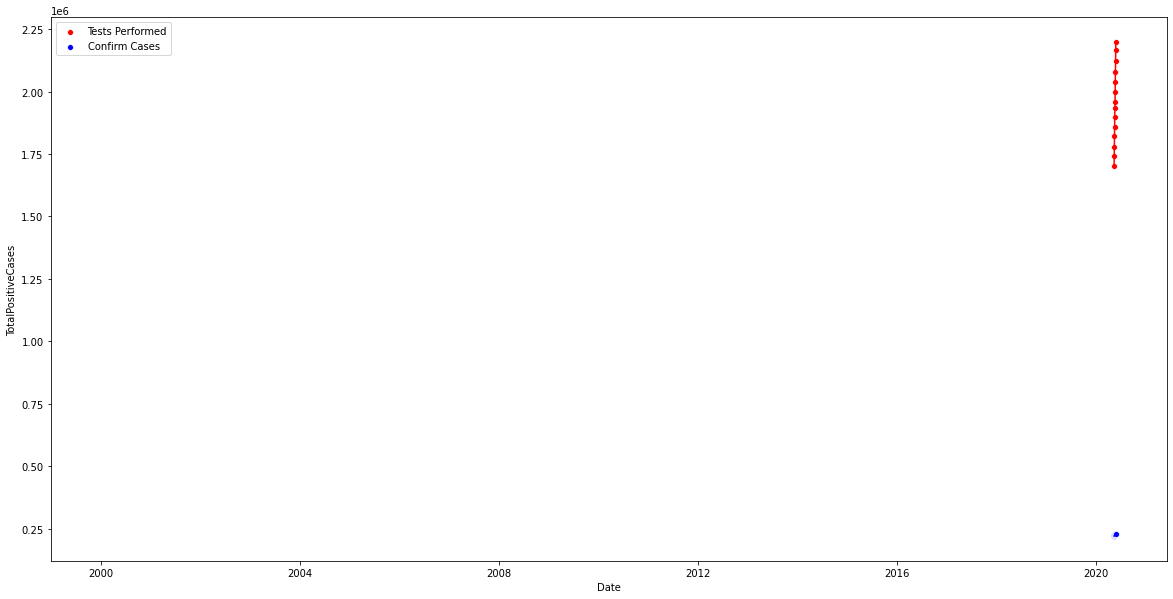

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TestsPerformed,label="Tests Performed")
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test Performed vs Confirmed Cases',fontsize = 35)
plt.show()

f, ax = plt.subplots(figsize=(20,10))
ax=sns.scatterplot(x="Date", y="TestsPerformed", data=dgd2,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TestsPerformed,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.RegionName, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgd2.RegionName, dgd2.TotalHospitalizedPatients,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(40,20))

ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="RegionName", y="TotalHospitalizedPatients", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=18)
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalHospitalizedPatients,zorder=1,color="red")

AttributeError: ignored

<Figure size 1656x720 with 0 Axes>

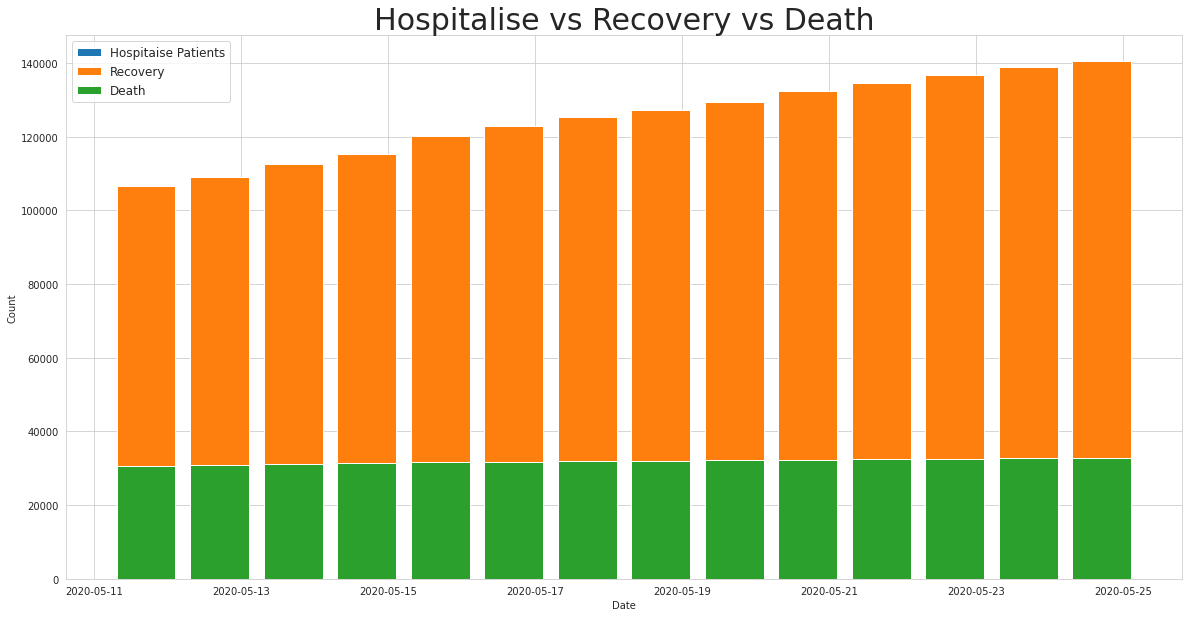

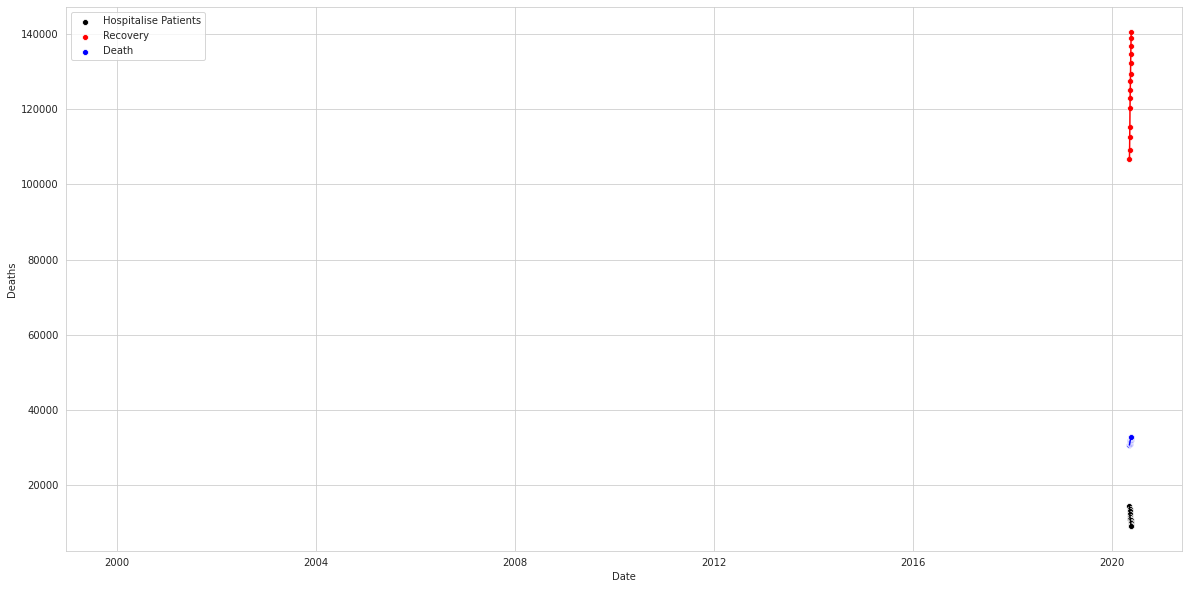

In [ ]:
plt.figure(figsize=(20,10))
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitaise Patients")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalise vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(20,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="black",label = "Hospitalise Patients")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

In [ ]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd1 = data_groupby_date1

In [ ]:
dgd1['Confirmed_new'] = dgd1['TotalPositiveCases']-dgd1['TotalPositiveCases'].shift(1)
dgd1['Recovered_new'] = dgd1['Recovered']-dgd1['Recovered'].shift(1)
dgd1['Deaths_new'] = dgd1['Deaths']-dgd1['Deaths'].shift(1)
dgd1['TotalHospitalizedPatients_new'] = dgd1['TotalHospitalizedPatients']-dgd1['TotalHospitalizedPatients'].shift(1)

In [ ]:
dgd1.head()


,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients,Confirmed_new,Recovered_new,Deaths_new,TotalHospitalizedPatients_new
0,2020-02-24 18:00:00,229,7,1,0.0,101,127,NaN,NaN,NaN,NaN
1,2020-02-25 18:00:00,322,10,1,0.0,114,149,93.0,0.0,3.0,22.0
2,2020-02-26 18:00:00,400,12,3,0.0,128,164,78.0,2.0,2.0,15.0
3,2020-02-27 18:00:00,650,17,45,0.0,248,304,250.0,42.0,5.0,140.0
4,2020-02-28 18:00:00,888,21,46,0.0,345,409,238.0,1.0,4.0,105.0


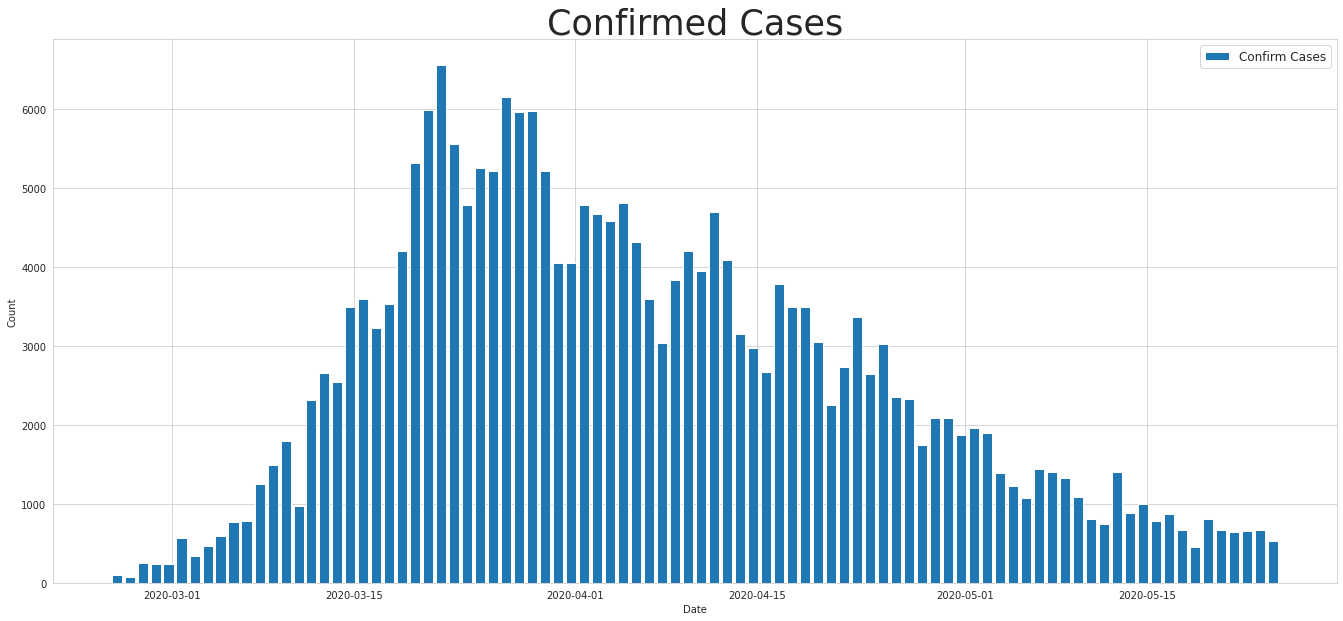

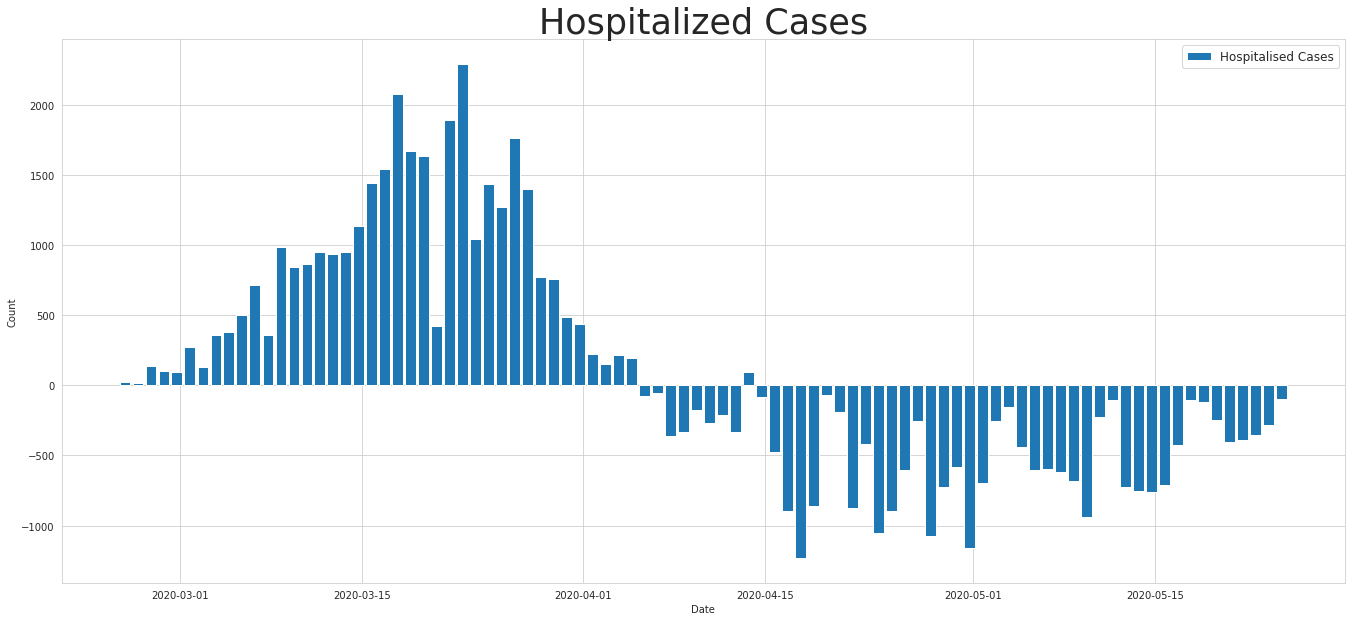

In [ ]:
plt.figure(figsize=(23,10))
plt.bar(dgd1.Date, dgd1.Confirmed_new,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases',fontsize = 35)
plt.show()

plt.figure(figsize=(23,10))
plt.bar(dgd1.Date, dgd1.TotalHospitalizedPatients_new,label="Hospitalised Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalized Cases',fontsize = 35)
plt.show()
